In [15]:
import os
print(os.getcwd())

/home/common/komarov.na


In [16]:
os.chdir('/home/common/komarov.na')
print(os.getcwd())

/home/common/komarov.na


In [17]:
DIR = os.getcwd() + '/results/article_orig_settings_short/result_somatic'
file_names = ['SRR7624520+test__', 'SRR7624521+test__', 'SRR7624522+test__', 'SRR7624523+test__']

In [18]:
import pandas as pd

In [19]:
res = pd.read_table(DIR + '/metatable_ts.txt')# '/result_somatic/' + 'metatable_ts.txt')
print(res.shape)
res.head()

(22976, 38)


,METACLUSTER_ID,FILENAME,READNAME,CHR,POS,INS_STRAND,PRIMER,RE,RE_AMOUNT,RE_HAMMING,...,SRR7624520+test___NUM_BC,SRR7624521+test___NUM_BC,SRR7624522+test___NUM_BC,SRR7624523+test___NUM_BC,SRR7624520+test___NUM_TLEN,SRR7624521+test___NUM_TLEN,SRR7624522+test___NUM_TLEN,SRR7624523+test___NUM_TLEN,MDFLAG_TEMPLATE,MDMATCH
0,1,SRR7624521+test__,SRR7624521.5925867.1,chr1,80934,+,GAGCCACCGCGC,CCGGCC,2,0,...,0,2,0,0,0,1,0,0,MD:Z:29,29
1,2,SRR7624522+test__,SRR7624522.6008022.2,chr1,147922,+,GAGCCACCGCGC,CCGGCC,1,0,...,0,0,1,0,0,0,1,0,MD:Z:29,29
2,3,SRR7624520+test__,ARTIFICIAL:2262337645,chr1,196273,+,GAGCCACCGCGC,CCGGCC,4,0,...,1,1,1,1,1,1,1,1,MD:Z:9C10T8,27
3,4,SRR7624523+test__,SRR7624523.792448.2,chr1,1530553,+,GAGCCACCGCGC,CCGGCC,12324,0,...,0,3060,3264,2414,0,3,5,3,MD:Z:29,29
4,5,SRR7624522+test__,SRR7624522.6084773.2,chr1,1549246,+,GAGCCACCGCGC,CCGGCC,4,0,...,1,1,1,1,1,1,1,1,MD:Z:19A9,28


In [20]:
# checking for null occurrences 
df_0 = res.copy(deep=True)
for i in range(4):
    df_0 = df_0[df_0[file_names[i] + '_NUM_READS'] == 0]
print(df_0.shape)
df_0.head()

(0, 38)


,METACLUSTER_ID,FILENAME,READNAME,CHR,POS,INS_STRAND,PRIMER,RE,RE_AMOUNT,RE_HAMMING,...,SRR7624520+test___NUM_BC,SRR7624521+test___NUM_BC,SRR7624522+test___NUM_BC,SRR7624523+test___NUM_BC,SRR7624520+test___NUM_TLEN,SRR7624521+test___NUM_TLEN,SRR7624522+test___NUM_TLEN,SRR7624523+test___NUM_TLEN,MDFLAG_TEMPLATE,MDMATCH


In [21]:
# not somatic (germline) insertions (exists in all samples)
df_germ = res.copy(deep=True)
for i in range(4):
    df_germ = df_germ[df_germ[file_names[i] + '_NUM_READS'] > 0]
print('all:', df_germ.shape[0],  '  test:', df_germ[df_germ['READNAME'].str.contains('ARTIFICIAL')].shape[0])
df_germ.head()

all: 3265   test: 912


,METACLUSTER_ID,FILENAME,READNAME,CHR,POS,INS_STRAND,PRIMER,RE,RE_AMOUNT,RE_HAMMING,...,SRR7624520+test___NUM_BC,SRR7624521+test___NUM_BC,SRR7624522+test___NUM_BC,SRR7624523+test___NUM_BC,SRR7624520+test___NUM_TLEN,SRR7624521+test___NUM_TLEN,SRR7624522+test___NUM_TLEN,SRR7624523+test___NUM_TLEN,MDFLAG_TEMPLATE,MDMATCH
2,3,SRR7624520+test__,ARTIFICIAL:2262337645,chr1,196273,+,GAGCCACCGCGC,CCGGCC,4,0,...,1,1,1,1,1,1,1,1,MD:Z:9C10T8,27
4,5,SRR7624522+test__,SRR7624522.6084773.2,chr1,1549246,+,GAGCCACCGCGC,CCGGCC,4,0,...,1,1,1,1,1,1,1,1,MD:Z:19A9,28
23,24,SRR7624521+test__,SRR7624521.1163160.1,chr1,6522070,+,GAGCCACCGCGC,CCGGCC,66,0,...,13,17,18,17,1,2,1,1,MD:Z:29,29
37,38,SRR7624523+test__,SRR7624523.1028824.2,chr1,9762889,+,GAGCCACCGCGC,CCGGCC,59,0,...,5,41,9,5,1,1,1,1,MD:Z:28,28
40,41,SRR7624521+test__,SRR7624521.212727.1,chr1,9799371,+,GAGCCACCGCGC,CCGGCT,29,1,...,3,13,11,2,1,1,1,1,MD:Z:29,29


In [22]:
df_germ[df_germ['READNAME'].str.contains('ARTIFICIAL')].head()

,METACLUSTER_ID,FILENAME,READNAME,CHR,POS,INS_STRAND,PRIMER,RE,RE_AMOUNT,RE_HAMMING,...,SRR7624520+test___NUM_BC,SRR7624521+test___NUM_BC,SRR7624522+test___NUM_BC,SRR7624523+test___NUM_BC,SRR7624520+test___NUM_TLEN,SRR7624521+test___NUM_TLEN,SRR7624522+test___NUM_TLEN,SRR7624523+test___NUM_TLEN,MDFLAG_TEMPLATE,MDMATCH
2,3,SRR7624520+test__,ARTIFICIAL:2262337645,chr1,196273,+,GAGCCACCGCGC,CCGGCC,4,0,...,1,1,1,1,1,1,1,1,MD:Z:9C10T8,27
97,98,SRR7624520+test__,ARTIFICIAL:4994372142,chr1,19280125,+,GAGCCACCGCGC,CCGGCC,4,0,...,1,1,1,1,1,1,1,1,MD:Z:26C2,28
207,208,SRR7624520+test__,ARTIFICIAL:9954574899,chr1,41854783,+,GAGCCACCGCGC,CCGGCC,4,0,...,1,1,1,1,1,1,1,1,*,0
209,210,SRR7624522+test__,ARTIFICIAL:8778875653,chr1,41952552,+,GAGCCACCGCGC,CCGGCC,4,0,...,1,1,1,1,1,1,1,1,*,0
242,243,SRR7624520+test__,ARTIFICIAL:1114953839,chr1,46788767,+,GAGCCACCGCGC,CCGGCC,4,0,...,1,1,1,1,1,1,1,1,MD:Z:0A9A18,27


In [23]:
# somatic and quasi-somatic (exists for example in 3/4 samples) insertions
df_qsom = res.copy(deep=True)
df_qsom = df_qsom.drop(df_germ.index, axis=0)
print(df_qsom.shape, '  test:', df_qsom[df_qsom['READNAME'].str.contains('ARTIFICIAL')].shape[0])
df_qsom.head()

(19711, 38)   test: 74


,METACLUSTER_ID,FILENAME,READNAME,CHR,POS,INS_STRAND,PRIMER,RE,RE_AMOUNT,RE_HAMMING,...,SRR7624520+test___NUM_BC,SRR7624521+test___NUM_BC,SRR7624522+test___NUM_BC,SRR7624523+test___NUM_BC,SRR7624520+test___NUM_TLEN,SRR7624521+test___NUM_TLEN,SRR7624522+test___NUM_TLEN,SRR7624523+test___NUM_TLEN,MDFLAG_TEMPLATE,MDMATCH
0,1,SRR7624521+test__,SRR7624521.5925867.1,chr1,80934,+,GAGCCACCGCGC,CCGGCC,2,0,...,0,2,0,0,0,1,0,0,MD:Z:29,29
1,2,SRR7624522+test__,SRR7624522.6008022.2,chr1,147922,+,GAGCCACCGCGC,CCGGCC,1,0,...,0,0,1,0,0,0,1,0,MD:Z:29,29
3,4,SRR7624523+test__,SRR7624523.792448.2,chr1,1530553,+,GAGCCACCGCGC,CCGGCC,12324,0,...,0,3060,3264,2414,0,3,5,3,MD:Z:29,29
5,6,SRR7624521+test__,SRR7624521.5192365.1,chr1,1627546,+,GAGCCACCGCGC,CCGGCC,1,0,...,0,1,0,0,0,1,0,0,MD:Z:10C14A3,27
6,7,SRR7624521+test__,SRR7624521.6995156.1,chr1,1934731,+,GAGCCACCGCGC,CCGGCC,1,0,...,0,1,0,0,0,1,0,0,MD:Z:9G18,27


In [24]:
# insertions specific only for this tissue 
df_somatic_list = []
overall_num = 0
for i in range(4):
    df = df_qsom.copy(deep=True)
    df = df[df[file_names[i] + '_NUM_READS'] > 0]
    df = df[df[file_names[i - 1] + '_NUM_READS'] == 0]
    df = df[df[file_names[i - 2] + '_NUM_READS'] == 0]
    df = df[df[file_names[i - 3] + '_NUM_READS'] == 0]
    print(file_names[i], df.shape[0], '  test:', df[df['READNAME'].str.contains('ARTIFICIAL')].shape[0])
    overall_num += df.shape[0]
    df_somatic_list.append(df.copy(deep=True))
print(overall_num)

SRR7624520+test__ 2773   test: 1
SRR7624521+test__ 6733   test: 1
SRR7624522+test__ 3377   test: 0
SRR7624523+test__ 2423   test: 0
15306


In [25]:
# file 1
df_fcn = df_somatic_list[0].copy(deep=True)
print(df_fcn.shape)
df_fcn.head()

(2773, 38)


,METACLUSTER_ID,FILENAME,READNAME,CHR,POS,INS_STRAND,PRIMER,RE,RE_AMOUNT,RE_HAMMING,...,SRR7624520+test___NUM_BC,SRR7624521+test___NUM_BC,SRR7624522+test___NUM_BC,SRR7624523+test___NUM_BC,SRR7624520+test___NUM_TLEN,SRR7624521+test___NUM_TLEN,SRR7624522+test___NUM_TLEN,SRR7624523+test___NUM_TLEN,MDFLAG_TEMPLATE,MDMATCH
15,16,SRR7624520+test__,SRR7624520.1489694.1,chr1,4283232,+,GAGCCACCGCGC,CCGGCC,1,0,...,1,0,0,0,1,0,0,0,MD:Z:8C20,28
17,18,SRR7624520+test__,SRR7624520.874082.1,chr1,4800665,+,GAGCCACCGCGC,CCGGCC,1,0,...,1,0,0,0,1,0,0,0,*,0
18,19,SRR7624520+test__,SRR7624520.2174129.1,chr1,5434082,+,GAGCCACCGCGC,CCGGCC,1,0,...,1,0,0,0,1,0,0,0,MD:Z:7T21,28
31,32,SRR7624520+test__,SRR7624520.6060875.1,chr1,8493503,+,GAGCCACCGCGC,CCGGCT,1,1,...,1,0,0,0,1,0,0,0,MD:Z:2G0G25,27
34,35,SRR7624520+test__,SRR7624520.8142773.1,chr1,8914881,+,GAGCCACCGCGC,CCGGCC,1,0,...,1,0,0,0,1,0,0,0,MD:Z:18T10,28


In [12]:
#df_tmp = df_fcn[df_fcn['SRR7624520+test___NUM_BC'] > 1]
#df_tmp = df_tmp[df_tmp['MDMATCH'] < 29]
#print(df_tmp.shape[0])
#print(df_tmp[['READNAME', 'RE_AMOUNT']] )

In [30]:
df_tmp = df_fcn[df_fcn['SRR7624520+test___NUM_READS'] > 5]
#df_tmp = df_tmp[df_tmp['SRR7624520+test___NUM_READS'] < 300]
df_tmp = df_tmp[df_tmp['R1'].str.len() > 20]
df_tmp = df_tmp[df_tmp['R2'].str.len() > 20]
#df_tmp = df_tmp[df_tmp['MDMATCH'] < 29]
print(df_tmp.shape[0])
# print(df_tmp[['READNAME', 'RE_AMOUNT', 'SRR7624520+test___NUM_READS']] )

10


In [31]:
from random import randint
rand_flanks = []
N = 20
if N < df_tmp.shape[0]:
    for i in range(20):
        rand_num = randint(0, df_tmp.shape[0] - 1)
        while rand_flanks.count(rand_num) != 0:
            rand_num = randint(0, df_tmp.shape[0] - 1)
        rand_flanks.append(rand_num) 
    print(rand_flanks)
    df = df_tmp.iloc[rand_flanks, :]
else:
    df = df_tmp.copy()
pd.options.display.max_colwidth = 100
df[['INS_STRAND', 'SRR7624520+test___NUM_READS', 'CHR', 'POS', 'PRIMER', 'RE', 'R1', 'R2']]

,INS_STRAND,SRR7624520+test___NUM_READS,CHR,POS,PRIMER,RE,R1,R2
495,+,3486,chr1,108278773,GAGCCACCGCGC,CCGGCC,GACTCTTCTTACTTTTAAGGACACATATAATTGAAACTATTTTGGAAAACAAGAGAGCAGGGATAG,CTATCCCTGCTCTCTTGTTTTCCAAAATAGTTTCAATTATATGTGTCCTTAAAAGTAAGAAGAGTCGGCCG
731,+,8,chr1,172594079,GAGCCACCGCGC,CCGGCC,TACTATAAACACTTCTATGCCAATAAACTAGAAAATCCAGAAGAAATGGATAAATTCCTGGACACATACACCCTCCCAAGAC,CTCCTCTTTGTACCTCTGGTAAAATTCATCTGTGAATCTGTCTGGTCCTGGACTTTTTTTGGTTGGTAGGCT
8037,+,9,chr17,48884950,GAGCCACCGCGC,CCGGCC,TCTAATCCATTTTGGAAGGTTAGTCTTACATGGTTGTTGCATTCCACAACTATCGGTAGATTATCTTTAAAAAGGGAAGCAA,CTCCCTCTGCTGGACAAATGTGAAATTGCTTCCCTTTTTAAAGATAATCTACCGATAGTTGTGGAATGCAAC
9931,+,343,chr2,75940832,GAGCCACCGCGC,CCGGCC,TGGTTTTTTTTTTTTTTTTGACAGTCTTGCTGTTCCCAGGCTGGAGTGCAGTGGTGCGACCTCAG,CTGAGGTCGCACCACTGCACTCCAGCCTGGGAACAGCAAGACTGTCAAAAAAAAAAAAAAAAAAAAACCGGG
13934,-,6,chr3,174710558,GAGCCACCGCGC,CCGGCC,ATGAAATTTTAAAATTTTTTTCTCTGCCTAGTTGCAGACGAGGAAGTTAGTGATGAGGCACAAGAAAGATTTCAGGCAAAAC,CTCGCAGAGGCTGCCTGCATTCTTTGCCAGATGGCCCCCTCCATCTTCAAGAGGGCAGTTTTGCCTGAAATC
14010,+,6,chr4,1791888,GAGCCACCGCGC,CCGGCC,AGTTTTTTTTTTTTTTTTTGAGAGGGAGTCTCGCTCTGTCACCCAGTCTGGAGTGCAGTGGCACAATCTCAG,CTGAGAGTGTGCCACTGCACTCCAGCCTGGGTGACAGAGCGAGACTCCCTCTCAAAAAAAAAAAAAAAAAAA
15308,-,14,chr4,124630676,GAGCCACCGCGC,CCGGCC,TTTTCTTCTTTTTTAAGTCTGAATAATATTCTCTTGTTTGTATTCACCACATTTTATGTATCCATTCATCCATCAATAGACA,CTAAAAGTGGAATCAATCAAGTGTCTATTGATGGATGAATGGATACATAAAATGTGGTGAATACAAACAAGA
16205,+,7336,chr5,165768711,GAGCCACCGCGC,CCGGCC,CGGCCGTGATGTTATTTTTTATACTATTCCCAAGTGCATATTCATTTAATAAATTAGTATTTTAAAAG,CTTTTAAAATACTAATTTATTAAATGAATATGCACTTGGGAATAGTATAAAAAATAACATCACGGCCGGGCG
19411,+,3320,chr8,12641531,GAGCCACCGCGC,CCGGCC,AGGTTTTTTATTCATTATGAAAAATTTTCAATATACATAAAAGTAGAGAGACTAGTTTAATGAG,CTCATTAAACTAGTCTCTCTACTTTTATGTATATTGAAAATTTTTCATAATGAATAAAAAACCTGGCCGGGC
20411,-,6,chr8,122547482,GAGCCACCGCGC,CCGGCC,AGAGTTAAACTCAGGCCCACTCAACTTTAACCCCCATATTCTTTCCTCTACACTACCCTTTCCACTCCAGCATGCTACAATT,CTCCTTCTGTTCTTCACTTAGTACTTAGGACAGTTCTGCACCCCCCAGGGATACTCAGGAAATGCTCAGAAT


In [15]:
def complement(char):
    if char == 'A':
        return 'T'
    if char == 'T':
        return 'A'
    if char == 'C':
        return 'G'
    if char == 'G':
        return 'C'

def reverse_comp(seq):
    seq_ls = list(seq)
    new_seq = []
    for i in reversed(seq_ls):
        new_seq.append(complement(i))
    return "".join(new_seq)

In [17]:
R1_orig_list = list(df['R1'])
R1_orig_list

['GACTCTTCTTACTTTTAAGGACACATATAATTGAAACTATTTTGGAAAACAAGAGAGCAGGGATAG',
 'TACTATAAACACTTCTATGCCAATAAACTAGAAAATCCAGAAGAAATGGATAAATTCCTGGACACATACACCCTCCCAAGAC',
 'TCTAATCCATTTTGGAAGGTTAGTCTTACATGGTTGTTGCATTCCACAACTATCGGTAGATTATCTTTAAAAAGGGAAGCAA',
 'TGGTTTTTTTTTTTTTTTTGACAGTCTTGCTGTTCCCAGGCTGGAGTGCAGTGGTGCGACCTCAG',
 'ATTTTTTTATTTTTTTTAGCCTTGCATTTGCCCGTGAGAGGAGCAGCCACACTGGAACGAG',
 'ATGAAATTTTAAAATTTTTTTCTCTGCCTAGTTGCAGACGAGGAAGTTAGTGATGAGGCACAAGAAAGATTTCAGGCAAAAC',
 'AGTTTTTTTTTTTTTTTTTGAGAGGGAGTCTCGCTCTGTCACCCAGTCTGGAGTGCAGTGGCACAATCTCAG',
 'TTTTCTTCTTTTTTAAGTCTGAATAATATTCTCTTGTTTGTATTCACCACATTTTATGTATCCATTCATCCATCAATAGACA',
 'AGAGTTAAACTCAGGCCCACTCAACTTTAACCCCCATATTCTTTCCTCTACACTACCCTTTCCACTCCAGCATGCTACAATT']

In [42]:
# ready for copying into blat 
R1_orig_list = list(df['R1'])
i = 0
for read in R1_orig_list:
    print(f'>{i+1}_R1')
    print(R1_orig_list[i])
    i += 1

>1_R1
GACTCTTCTTACTTTTAAGGACACATATAATTGAAACTATTTTGGAAAACAAGAGAGCAGGGATAG
>2_R1
TACTATAAACACTTCTATGCCAATAAACTAGAAAATCCAGAAGAAATGGATAAATTCCTGGACACATACACCCTCCCAAGAC
>3_R1
TCTAATCCATTTTGGAAGGTTAGTCTTACATGGTTGTTGCATTCCACAACTATCGGTAGATTATCTTTAAAAAGGGAAGCAA
>4_R1
TGGTTTTTTTTTTTTTTTTGACAGTCTTGCTGTTCCCAGGCTGGAGTGCAGTGGTGCGACCTCAG
>5_R1
ATTTTTTTATTTTTTTTAGCCTTGCATTTGCCCGTGAGAGGAGCAGCCACACTGGAACGAG
>6_R1
ATGAAATTTTAAAATTTTTTTCTCTGCCTAGTTGCAGACGAGGAAGTTAGTGATGAGGCACAAGAAAGATTTCAGGCAAAAC
>7_R1
AGTTTTTTTTTTTTTTTTTGAGAGGGAGTCTCGCTCTGTCACCCAGTCTGGAGTGCAGTGGCACAATCTCAG
>8_R1
TTTTCTTCTTTTTTAAGTCTGAATAATATTCTCTTGTTTGTATTCACCACATTTTATGTATCCATTCATCCATCAATAGACA
>9_R1
AGAGTTAAACTCAGGCCCACTCAACTTTAACCCCCATATTCTTTCCTCTACACTACCCTTTCCACTCCAGCATGCTACAATT


In [19]:
R2_orig_list = list(df['R2'])
i = 1
R2_rev_comp = []
for read in R2_orig_list:
    print(f'>{i}_R2')
    R2_rev_comp.append(reverse_comp(read))
    print(reverse_comp(read))
    i += 1

>1_R2
CGGCCGACTCTTCTTACTTTTAAGGACACATATAATTGAAACTATTTTGGAAAACAAGAGAGCAGGGATAG
>2_R2
AGCCTACCAACCAAAAAAAGTCCAGGACCAGACAGATTCACAGATGAATTTTACCAGAGGTACAAAGAGGAG
>3_R2
GTTGCATTCCACAACTATCGGTAGATTATCTTTAAAAAGGGAAGCAATTTCACATTTGTCCAGCAGAGGGAG
>4_R2
CCCGGTTTTTTTTTTTTTTTTTTTTTGACAGTCTTGCTGTTCCCAGGCTGGAGTGCAGTGGTGCGACCTCAG
>5_R2
CGCGCCCGGCCATTTTTTTATTTTTTTTAGCCTTGCATTTGCCCGTGAGAGGAGCAGCCACACTGGAACGAG
>6_R2
GATTTCAGGCAAAACTGCCCTCTTGAAGATGGAGGGGGCCATCTGGCAAAGAATGCAGGCAGCCTCTGCGAG
>7_R2
TTTTTTTTTTTTTTTTTTTGAGAGGGAGTCTCGCTCTGTCACCCAGGCTGGAGTGCAGTGGCACACTCTCAG
>8_R2
TCTTGTTTGTATTCACCACATTTTATGTATCCATTCATCCATCAATAGACACTTGATTGATTCCACTTTTAG
>9_R2
ATTCTGAGCATTTCCTGAGTATCCCTGGGGGGTGCAGAACTGTCCTAAGTACTAAGTGAAGAACAGAAGGAG


In [20]:
R2_rev_comp

['CGGCCGACTCTTCTTACTTTTAAGGACACATATAATTGAAACTATTTTGGAAAACAAGAGAGCAGGGATAG',
 'AGCCTACCAACCAAAAAAAGTCCAGGACCAGACAGATTCACAGATGAATTTTACCAGAGGTACAAAGAGGAG',
 'GTTGCATTCCACAACTATCGGTAGATTATCTTTAAAAAGGGAAGCAATTTCACATTTGTCCAGCAGAGGGAG',
 'CCCGGTTTTTTTTTTTTTTTTTTTTTGACAGTCTTGCTGTTCCCAGGCTGGAGTGCAGTGGTGCGACCTCAG',
 'CGCGCCCGGCCATTTTTTTATTTTTTTTAGCCTTGCATTTGCCCGTGAGAGGAGCAGCCACACTGGAACGAG',
 'GATTTCAGGCAAAACTGCCCTCTTGAAGATGGAGGGGGCCATCTGGCAAAGAATGCAGGCAGCCTCTGCGAG',
 'TTTTTTTTTTTTTTTTTTTGAGAGGGAGTCTCGCTCTGTCACCCAGGCTGGAGTGCAGTGGCACACTCTCAG',
 'TCTTGTTTGTATTCACCACATTTTATGTATCCATTCATCCATCAATAGACACTTGATTGATTCCACTTTTAG',
 'ATTCTGAGCATTTCCTGAGTATCCCTGGGGGGTGCAGAACTGTCCTAAGTACTAAGTGAAGAACAGAAGGAG']

In [15]:
df_tmp = df_somatic_list[1][df_somatic_list[1]['SRR7624521+test___NUM_READS'] > 1]
#df_tmp = df_tmp[df_tmp['MDMATCH'] < 29]
print(df_tmp.shape[0])

950


In [77]:
df_tmp = df_somatic_list[2][df_somatic_list[2]['SRR7624522+test___NUM_READS'] > 1]
#df_tmp = df_tmp[df_tmp['MDMATCH'] < 29]
print(df_tmp.shape[0])

198


In [78]:
df_tmp = df_somatic_list[3][df_somatic_list[3]['SRR7624523+test___NUM_READS'] > 1]
#df_tmp = df_tmp[df_tmp['MDMATCH'] < 29]
print(df_tmp.shape[0])

130


In [26]:
# reads specific to file 

i = 0
for name in file_names:
    df = res[res['FILENAME'] == name]
    ''' df = df[df[file_names[i - 3] + '_NUM_READS'] == 0]
    df = df[df[file_names[i - 2] + '_NUM_READS'] == 0]
    df = df[df[file_names[i - 1] + '_NUM_READS'] == 0] '''
    print(name, sum(df[name + '_NUM_READS']))
    i += 1

SRR7624520+test__ 154878
SRR7624521+test__ 202943
SRR7624522+test__ 259072
SRR7624523+test__ 249221


In [27]:
# somatic reads 
i = 0
for name in file_names:
    df = res[res['FILENAME'] == name]
    df = df[df[file_names[i - 3] + '_NUM_READS'] == 0]
    df = df[df[file_names[i - 2] + '_NUM_READS'] == 0]
    df = df[df[file_names[i - 1] + '_NUM_READS'] == 0] # '''
    print(name, sum(df[name + '_NUM_READS']))
    i += 1

SRR7624520+test__ 8555
SRR7624521+test__ 19492
SRR7624522+test__ 5824
SRR7624523+test__ 17725


In [38]:
# all reads per file 
for name in file_names:
    #df = res[res['MDMATCH'] < 29] # [res['FILENAME'] == name]
    num_reads = sum(res[name + '_NUM_READS'])
    print(name, num_reads) 

SRR7624520+test__ 665386
SRR7624521+test__ 773158
SRR7624522+test__ 921010
SRR7624523+test__ 758740


In [90]:
import matplotlib.pyplot as plt

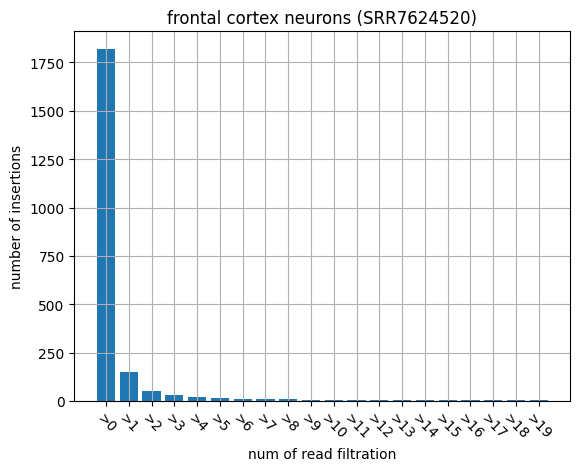

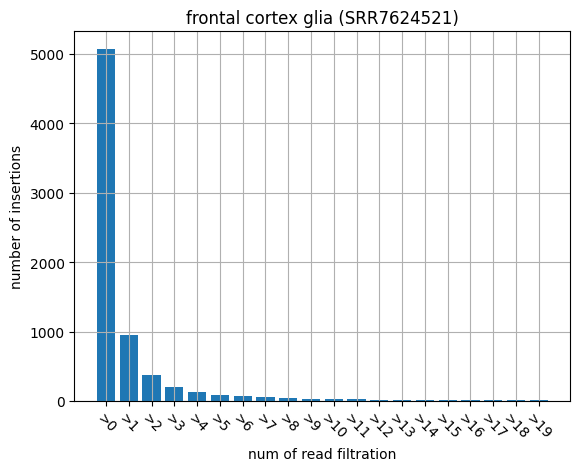

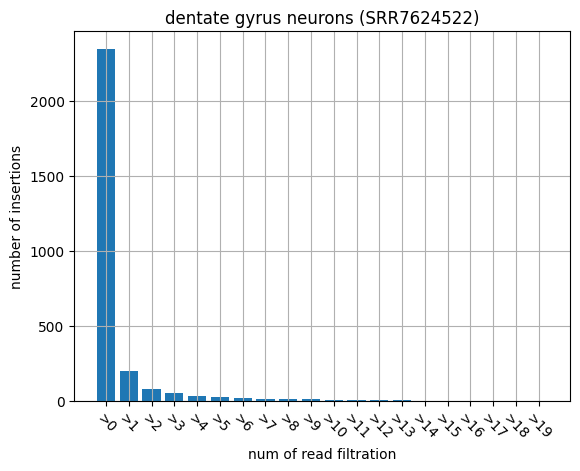

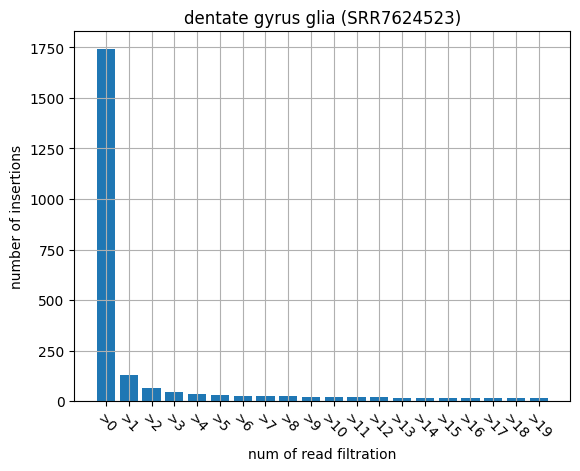

In [114]:
#fig = plt.figure(figsize=(6, 4))
titles = ['frontal cortex neurons', 'frontal cortex glia', 'dentate gyrus neurons', 'dentate gyrus glia']

for i in range(4):
    y = []
    #ax = fig.add_subplot()
    for j in range(20):
        amount_of_insertions = df_somatic_list[i][df_somatic_list[i][f'SRR762452{i}+test___NUM_READS'] > j].shape[0]
        y.append(amount_of_insertions)
    x = [f'>{i}' for i in range(20)]
    plt.bar(x, y)
    plt.grid()
    plt.ylabel('number of insertions')
    plt.xlabel('num of read filtration')
    plt.xticks(rotation=-45)
    plt.title(f'{titles[i]} (SRR762452{i})')
    plt.show()


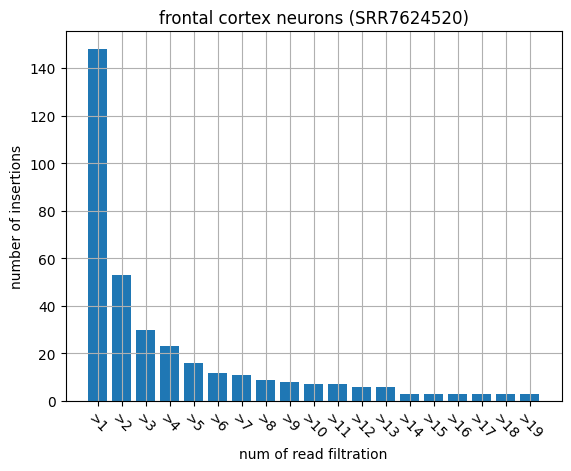

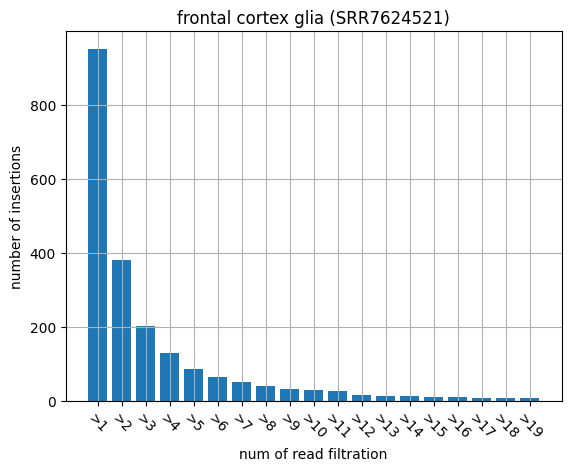

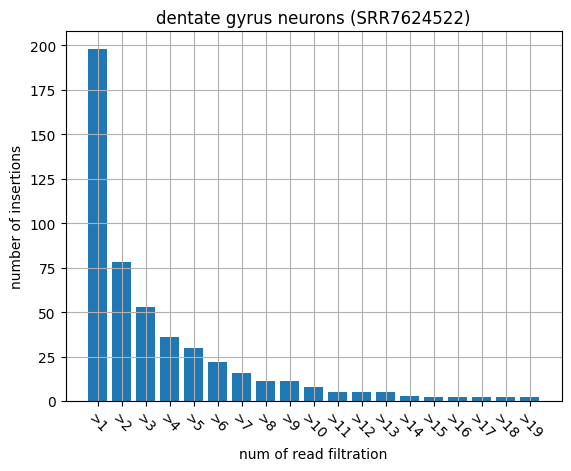

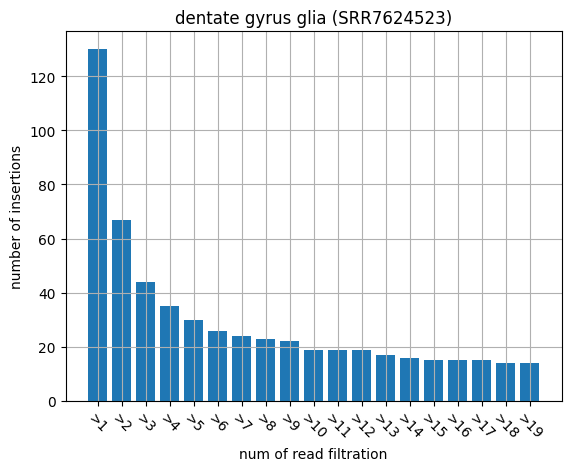

In [115]:
#fig = plt.figure(figsize=(6, 4))
titles = ['frontal cortex neurons', 'frontal cortex glia', 'dentate gyrus neurons', 'dentate gyrus glia']

for i in range(4):
    y = []
    #ax = fig.add_subplot()
    for j in range(1, 20):
        amount_of_insertions = df_somatic_list[i][df_somatic_list[i][f'SRR762452{i}+test___NUM_READS'] > j].shape[0]
        y.append(amount_of_insertions)
    x = [f'>{i}' for i in range(1, 20)]
    plt.bar(x, y)
    plt.grid()
    plt.ylabel('number of insertions')
    plt.xlabel('num of read filtration')
    plt.xticks(rotation=-45)
    plt.title(f'{titles[i]} (SRR762452{i})')
    plt.show()

# Artifitial 

In [85]:
DIR = os.getcwd() + '/OutPutDir/orig_artificial'
file_names = ['artificial_reads_2__', 'artificial_reads_3__', 'artificial_reads_4__', 'artificial_reads_5__']

In [81]:
import pandas as pd

In [83]:
res = pd.read_table(DIR + '/metatable_ts.txt')# '/result_somatic/' + 'metatable_ts.txt')
print(res.shape)
res.head()

(3752, 38)


,METACLUSTER_ID,FILENAME,READNAME,CHR,POS,INS_STRAND,PRIMER,RE,RE_AMOUNT,RE_HAMMING,...,artificial_reads_2___NUM_BC,artificial_reads_3___NUM_BC,artificial_reads_4___NUM_BC,artificial_reads_5___NUM_BC,artificial_reads_2___NUM_TLEN,artificial_reads_3___NUM_TLEN,artificial_reads_4___NUM_TLEN,artificial_reads_5___NUM_TLEN,MDFLAG_TEMPLATE,MDMATCH
0,1,artificial_reads_5__,ARTIFICIAL:2684028686,chr1,2972259,+,GAGCCACCGCGC,CCGGCC,1,0,...,0,0,0,1,0,0,0,1,*,0
1,2,artificial_reads_4__,ARTIFICIAL:4674044587,chr1,3284465,+,GAGCCACCGCGC,CCGGCC,1,0,...,0,0,1,0,0,0,1,0,MD:Z:22C6,28
2,3,artificial_reads_3__,ARTIFICIAL:2637583845,chr1,3792910,+,GAGCCACCGCGC,CCGGCC,1,0,...,0,1,0,0,0,1,0,0,MD:Z:13T14,27
3,4,artificial_reads_2__,ARTIFICIAL:9364981563,chr1,6009568,+,GAGCCACCGCGC,CCGGCC,1,0,...,1,0,0,0,1,0,0,0,*,0
4,5,artificial_reads_3__,ARTIFICIAL:1518391257,chr1,6970259,+,GAGCCACCGCGC,CCGGCC,1,0,...,0,1,0,0,0,1,0,0,*,0


In [86]:
# checking for null occurrences 
df_0 = res.copy(deep=True)
for i in range(4):
    df_0 = df_0[df_0[file_names[i] + '_NUM_READS'] == 0]
print(df_0.shape)
df_0.head()

(0, 38)


,METACLUSTER_ID,FILENAME,READNAME,CHR,POS,INS_STRAND,PRIMER,RE,RE_AMOUNT,RE_HAMMING,...,artificial_reads_2___NUM_BC,artificial_reads_3___NUM_BC,artificial_reads_4___NUM_BC,artificial_reads_5___NUM_BC,artificial_reads_2___NUM_TLEN,artificial_reads_3___NUM_TLEN,artificial_reads_4___NUM_TLEN,artificial_reads_5___NUM_TLEN,MDFLAG_TEMPLATE,MDMATCH


In [87]:
# not somatic (germline) insertions (exists in all samples)
df_germ = res.copy(deep=True)
for i in range(4):
    df_germ = df_germ[df_germ[file_names[i] + '_NUM_READS'] > 0]
print('all:', df_germ.shape[0],  '  test:', df_germ[df_germ['READNAME'].str.contains('ARTIFICIAL')].shape[0])
df_germ.head()

all: 0   test: 0


,METACLUSTER_ID,FILENAME,READNAME,CHR,POS,INS_STRAND,PRIMER,RE,RE_AMOUNT,RE_HAMMING,...,artificial_reads_2___NUM_BC,artificial_reads_3___NUM_BC,artificial_reads_4___NUM_BC,artificial_reads_5___NUM_BC,artificial_reads_2___NUM_TLEN,artificial_reads_3___NUM_TLEN,artificial_reads_4___NUM_TLEN,artificial_reads_5___NUM_TLEN,MDFLAG_TEMPLATE,MDMATCH


In [88]:
# somatic and quasi-somatic (exists for example in 3/4 samples) insertions
df_qsom = res.copy(deep=True)
df_qsom = df_qsom.drop(df_germ.index, axis=0)
print(df_qsom.shape, '  test:', df_qsom[df_qsom['READNAME'].str.contains('ARTIFICIAL')].shape[0])
df_qsom.head()

(3752, 38)   test: 3752


,METACLUSTER_ID,FILENAME,READNAME,CHR,POS,INS_STRAND,PRIMER,RE,RE_AMOUNT,RE_HAMMING,...,artificial_reads_2___NUM_BC,artificial_reads_3___NUM_BC,artificial_reads_4___NUM_BC,artificial_reads_5___NUM_BC,artificial_reads_2___NUM_TLEN,artificial_reads_3___NUM_TLEN,artificial_reads_4___NUM_TLEN,artificial_reads_5___NUM_TLEN,MDFLAG_TEMPLATE,MDMATCH
0,1,artificial_reads_5__,ARTIFICIAL:2684028686,chr1,2972259,+,GAGCCACCGCGC,CCGGCC,1,0,...,0,0,0,1,0,0,0,1,*,0
1,2,artificial_reads_4__,ARTIFICIAL:4674044587,chr1,3284465,+,GAGCCACCGCGC,CCGGCC,1,0,...,0,0,1,0,0,0,1,0,MD:Z:22C6,28
2,3,artificial_reads_3__,ARTIFICIAL:2637583845,chr1,3792910,+,GAGCCACCGCGC,CCGGCC,1,0,...,0,1,0,0,0,1,0,0,MD:Z:13T14,27
3,4,artificial_reads_2__,ARTIFICIAL:9364981563,chr1,6009568,+,GAGCCACCGCGC,CCGGCC,1,0,...,1,0,0,0,1,0,0,0,*,0
4,5,artificial_reads_3__,ARTIFICIAL:1518391257,chr1,6970259,+,GAGCCACCGCGC,CCGGCC,1,0,...,0,1,0,0,0,1,0,0,*,0


In [89]:
# insertions specific only for this tissue 
df_somatic_list = []
overall_num = 0
for i in range(4):
    df = df_qsom.copy(deep=True)
    df = df[df[file_names[i] + '_NUM_READS'] > 0]
    df = df[df[file_names[i - 1] + '_NUM_READS'] == 0]
    df = df[df[file_names[i - 2] + '_NUM_READS'] == 0]
    df = df[df[file_names[i - 3] + '_NUM_READS'] == 0]
    print(file_names[i], df.shape[0], '  test:', df[df['READNAME'].str.contains('ARTIFICIAL')].shape[0])
    overall_num += df.shape[0]
    df_somatic_list.append(df.copy(deep=True))
print(overall_num)

artificial_reads_2__ 930   test: 930
artificial_reads_3__ 939   test: 939
artificial_reads_4__ 950   test: 950
artificial_reads_5__ 929   test: 929
3748
